In [1]:
from sxs import julia

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
import scri
import sxs
import numpy as np
from matplotlib import pyplot as plt
from scri.asymptotic_bondi_data.map_to_superrest_frame import MT_to_WM, WM_to_MT

In [3]:
from sxs.julia import PNWaveform

In [9]:
import sys
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Git_Repositories/GWScripts/load_waveforms/')
sys.path.append('/home/aniketkhairnar/Desktop/Numerical/Cloned_repos/NRPNHybridization/')
from PYPostNewtonian.Code import PostNewtonian as PN

In [10]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [11]:
BBHs = df[(df['object_types'] == "BHBH") & (df['deprecated'] == False)]

In [12]:
qc = BBHs[(BBHs['reference_mass_ratio'] < 1.1) & (BBHs['reference_eccentricity'] < 1.e-4) 
& (BBHs['reference_dimensionless_spin1_mag'] < 1.e-4) & (BBHs['reference_dimensionless_spin2_mag'] < 1.e-4)
& (BBHs['reference_chi_eff'] < 1.e-4) ]

In [13]:
file_dir_list = ["SXS:BBH:3916/Lev4", "SXS:BBH:3928/Lev4", "SXS:BBH:2331/Lev3", "SXS:BBH:2337/Lev3",
    "SXS:BBH:2115/Lev4", "SXS:BBH:2120/Lev4", "SXS:BBH:2124/Lev4", "SXS:BBH:2143/Lev4",
    "SXS:BBH:2154/Lev4", "SXS:BBH:2374/Lev3", "SXS:BBH:1911/Lev3", "SXS:BBH:1942/Lev3",
    "SXS:BBH:2013/Lev3", "SXS:BBH:3619/Lev3", "SXS:BBH:2168/Lev3", "SXS:BBH:1429/Lev3",
    "SXS:BBH:2677/Lev4", "SXS:BBH:2696/Lev4", "SXS:BBH:4235/Lev4",
]

In [14]:
file_dir = file_dir_list[2]

In [15]:
sim = sxs.load(file_dir,extrapolation="N4").h

In [16]:
md = sim.metadata

In [17]:
i_relax = np.abs(sim.t - (md.reference_time)).argmin()
i_peak = np.abs(sim.t - (sim.max_norm_time())).argmin()

In [157]:
h = sim[i_relax + 100 : i_peak]

In [158]:
t = h.t

In [162]:
ϕ_21 = -np.unwrap(np.angle(-h.data[:, h.index(2,1)]))

In [148]:
ϕ_33 = - (1/3) * (np.angle(-h.data[:, h.index(3,3)]))

In [149]:
np.rad2deg(ϕ_33[0] - ϕ_21[0])

-0.670266039791842

In [150]:
np.rad2deg(ϕ_21[0])

-57.09722648598315

In [154]:
np.rad2deg(ϕ_33[0]) - np.rad2deg(ϕ_21[0])

-116.20525109134184

In [152]:
ϕ_33 = -  (np.angle(-h.data[:, h.index(3,3)]))

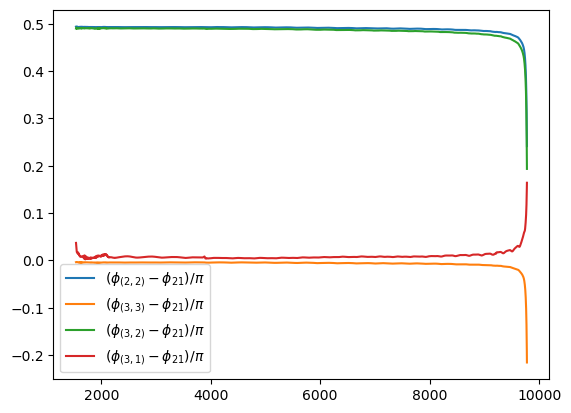

In [165]:
mode_to_eval = [(2,2), (3,3), (3,2), (3,1)]

for l,m in mode_to_eval:
    hlm = h.data[:, h.index(l,m)]
    ϕlm = (-1/m)*np.unwrap(np.angle(-hlm))
    plt.plot(h.t, (ϕlm - ϕ_21)/np.pi, label=rf'$(\phi_{{{l,m}}} - \phi_{{21}})/\pi$')
# plt.ylim(-1 , 0.8)
plt.legend()
# plt.savefig('phase.jpg')
plt.show()

In [118]:
ϕ_33[0]

0.7609618256202513

In [55]:
ϕ_21[0]

0.0802301415771056

In [72]:
h_scri = MT_to_WM( WM_to_MT(h))

In [73]:
h_21scri = h_scri.data[:, h.index(2,1)]

In [74]:
ψ_21 = -(np.unwrap(np.angle(-h_21scri)))

In [81]:
ψ_21_fix = -(np.unwrap(np.angle(-h_21scri) + np.pi/2))

In [75]:
Pdot = h_scri.momentum_flux()

In [76]:
Pdot_comp = Pdot[:,1] + 1j * Pdot[:,0]

In [83]:
λ_comp = np.cos( ψ_21_fix ) - 1j * np.sin( ψ_21_fix ) 

In [77]:
ψ_comp = -(np.unwrap(np.angle(Pdot_comp)))

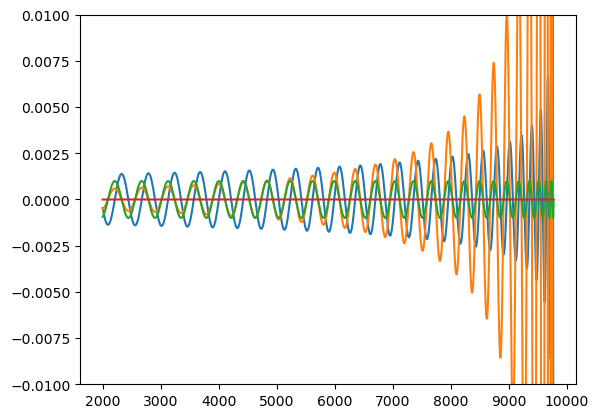

In [86]:
plt.plot(t, h_21scri)
plt.plot(t, 1.e5 * Pdot_comp)
plt.plot(t, 1.e-3 * λ_comp)
plt.plot(t, np.zeros(t.shape))
plt.ylim(-1.e-2, 1.e-2)
plt.show()

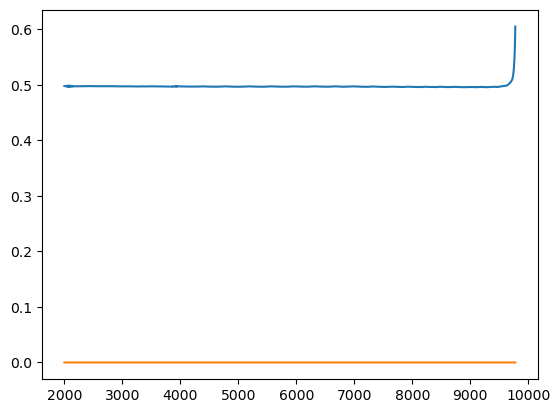

In [80]:
plt.plot(t, (ψ_21 - ψ_comp)/np.pi)
plt.plot(t, np.zeros(t.shape))
# plt.ylim(-1.e-7, 1.e-7)
plt.show()